<a href="https://colab.research.google.com/github/Maagnitude/diabetes-xai/blob/main/diabetes_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

In [48]:
# Import SHAP and XGBoost method libraries
import numpy as np
import xgboost
import shap

In [49]:
#Import diabetes dataset
ds_X, ds_Y = shap.datasets.diabetes()

Τυπώνουμε τα πρώτα 5 δείγματα του dataset που το έχουμε σε μορφή DataFrame.

In [55]:
ds_X.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

Δεν έχει null values, και όλες οι τιμές του είναι τύπου float.

In [56]:
ds_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [36]:
# X_train,X_test,y_train,y_test = train_test_split(ds_X, ds_Y, test_size=0.2, random_state=0)

In [45]:
#Train an XGBoost regression model
model = xgboost.XGBRegressor().fit(ds_X, ds_Y)
#Estimate the SHAP values for each dataset sample
explainer = shap.Explainer(model)
shap_values = explainer(ds_X)

[12:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## **GIVEN SAMPLE EXAMPLE**

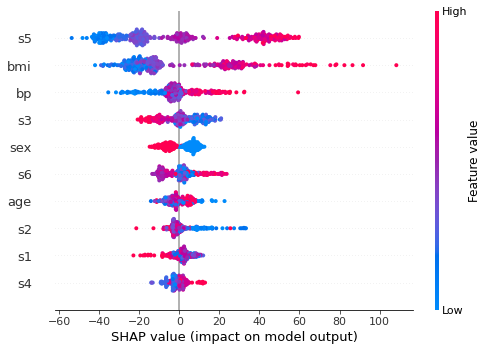

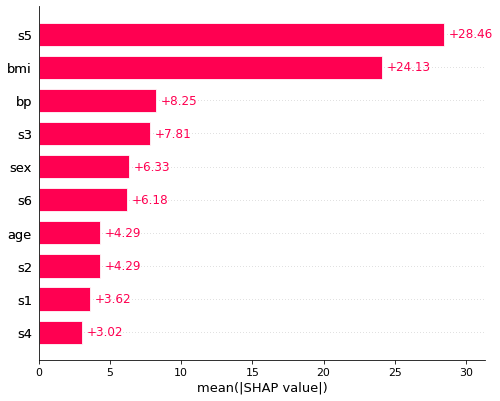

In [38]:
#Define the index of the examined sample for generating local explanations
sample_indx=0
#Visualize sample SHAP values for given example (local explanation)
shap.plots.waterfall(shap_values[sample_indx])

#Visualize (SHAP-based) sample force plot for given example (local explanation)
shap.initjs()
shap.plots.force(shap_values[sample_indx], matplotlib=True)

#Visualize (SHAP-based) summary plot of the effects of all features for all dataset samples (global explanation)
shap.initjs()
shap.plots.beeswarm(shap_values)

#Visualize mean absolute value of SHAP values for each feature for all dataset samples (global explanation)
shap.initjs()
shap.plots.bar(shap_values)

#Visualize interactive (SHAP-based) force plot for all samples in the dataset (global explanation)
shap.initjs()
shap.plots.force(shap_values)

## **OUR SAMPLE EXAMPLE**

**D. Γράφημα τιμών Shapley για τυχαία επιλεγμένο δείγμα.**
Στο παρακάτω γράφημα τιμών Shapley για το τυχαία επιλεγμένο δείγμα μας (νο.92), παρατηρούμε κάποια πράγματα:
* Αρχικά, το χαρακτηριστικό με την μεγαλύτερη (αρνητική) συνεισφορά είναι το bmi (-21.78), και με τη μεγαλύτερη θετική συνεισφορά είναι τα s5 και bp (+12.64 και +12.49).
* Το άθροισμα των συνεισφορών ισούται με την υπολογιζόμενη διαφορά (...)
* 

          age      sex       bmi        bp        s1        s2        s3  \
279  0.038076  0.05068 -0.024529  0.004658 -0.026336 -0.026366  0.015505   

           s4        s5       s6  
279 -0.039493 -0.015998 -0.02593  
[129.54002]


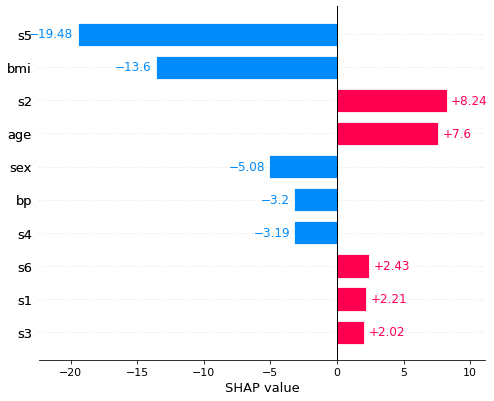

In [42]:
# selecting a random sample from a dataset (ds_X) and printing it out.
sample = X_train.sample(n=1)
print(sample)

predicted_values = model.predict(sample)

print(predicted_values)

# print("Predicted value for instance: %.2f" % ds_Y_pred[sample])
# print("Averange predicted value: %.2f" % ds_Y_pred.mean())
# print("Actual value: %.2f" % ds_Y_test[sample])

shap_values_sample = explainer(sample)

# Visualize mean absolute value of SHAP values for each feature of our sample.
shap.initjs()
shap.plots.bar(shap_values_sample[0])

**E. Γράφημα δύναμης (βάσει τιμών Shapley) για τυχαία επιλεγμένο δείγμα.**

         age       sex       bmi        bp        s1       s2        s3  \
24 -0.063635 -0.044642  0.035829 -0.022885 -0.030464 -0.01885 -0.006584   

          s4        s5        s6  
24 -0.002592 -0.025952 -0.054925  


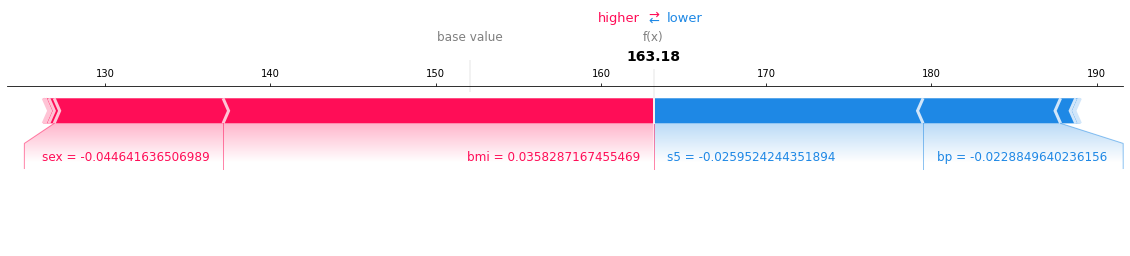

In [21]:
sample = ds_X.sample(n=1)
print(sample)

shap_values_sample = explainer(sample)

shap.initjs()
shap.plots.force(shap_values_sample[0], matplotlib=True)

**F. Γράφημα περίληψης (βάσει τιμών Shapley) για το σύνολο των δειγμάτων**

In [7]:
#Visualize (SHAP-based) summary plot of the effects of all features for all dataset samples (global explanation)
shap.initjs()
shap.plots.beeswarm(shap_values)

**G. Γράφημα μέσης απόλυτης τιμής των τιμών Shapley για το σύνολο των δειγμάτων**

In [8]:
# Plot the mean absolute Shap values for all features
#Visualize mean absolute value of SHAP values for each feature for all dataset samples (global explanation)
shap.initjs()
shap.summary_plot(shap_values, plot_type="bar")

**H. Διαδραστικό γράφημα δύναμης για το σύνολο των δειγμάτων (δώστε ενδεικτικά
παραδείγματα/εξηγήσεις/παρατηρήσεις από την εξέταση του γραφήματος)**

In [9]:
#Visualize interactive (SHAP-based) force plot for all samples in the dataset (global explanation)
shap.initjs()
shap.plots.force(shap_values)